In [42]:
from sklearn.metrics import classification_report

"""This file will be used to create a clothing image classification machine 
learning model. """

"""Citation:

For learning and creation of CNN model referenced and used code from: 

Foundation of CNN and Image Classification with TensorFlow completed using
Basic classification: Classify images of clothing tutorial 

Author: TensorFlow by Francois Chollet
Date: 2017
Title: Basic Classification: Classify image of clothing
Availability: https://www.tensorflow.org/tutorials/keras/classification
"""

'Citation:\n\nFor learning and creation of CNN model referenced and used code from: \n\nFoundation of CNN and Image Classification with TensorFlow completed using\nBasic classification: Classify images of clothing tutorial \n\nAuthor: TensorFlow by Francois Chollet\nDate: 2017\nTitle: Basic Classification: Classify image of clothing\nAvailability: https://www.tensorflow.org/tutorials/keras/classification\n'

In [43]:
# Import the necessary libraries
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.metrics import classification_report

In [44]:
# Load the data directly from TensorFlow

fashion_mnist = tf.keras.datasets.fashion_mnist

In [45]:
# The data loaded from the dataset is already loaded into four numpy arrays
# split into train_images, train_labels, test_images, and test_labels.
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

In [46]:
# Category names are not included in the dataset.

category_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Associated color for each category for consistency in all graphs throughout
# the exploration of this dataset and model creation. 

category_colors = ["lightskyblue", "deeppink", "greenyellow", "cyan", "orange",
                   "seagreen", "royalblue", "purple", "gold", "crimson"]

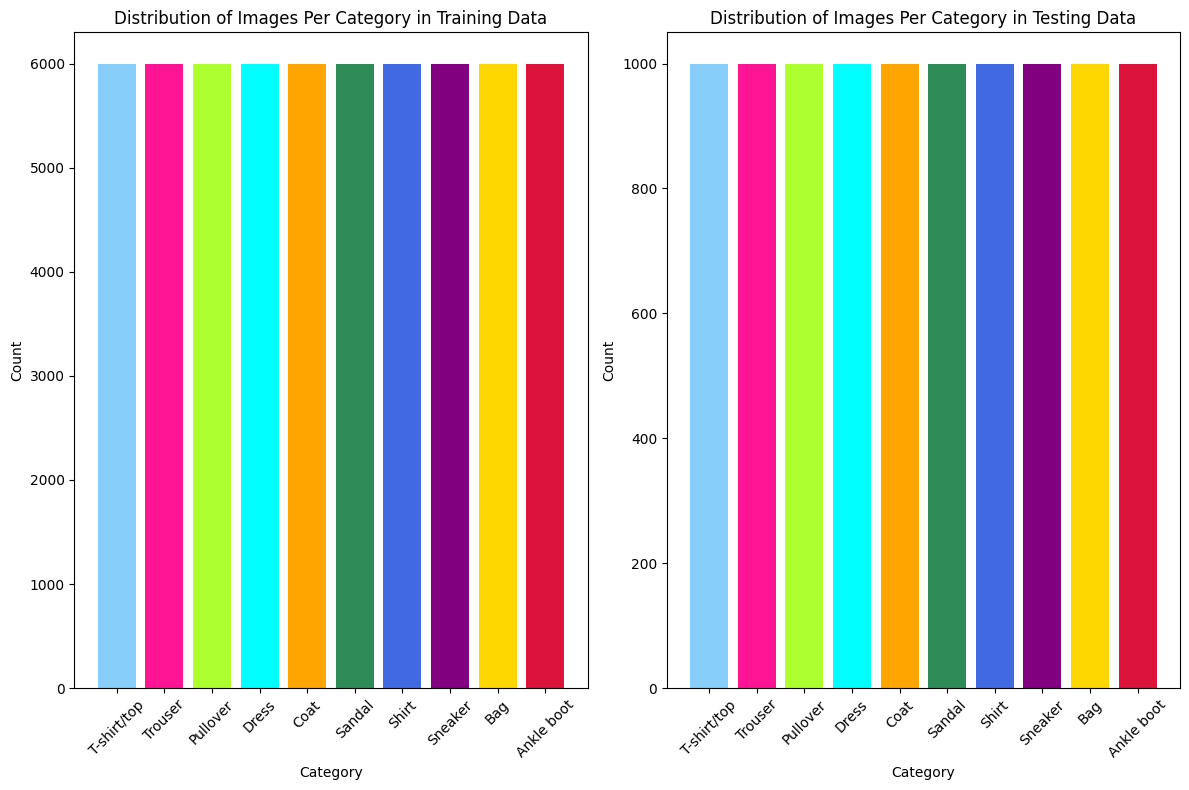

'Both the test and training data have an equal distribution of images for each\ncategory.'

In [47]:
# Visualize distribution of training data and test data for the number of 
# images in each category

# Count the number of images in each category (10) for training and testing
train_category_counts = np.bincount(train_labels, minlength=10)
test_category_counts = np.bincount(test_labels, minlength=10)

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot distribution of training data
axes[0].bar(category_names, train_category_counts, color=category_colors)
axes[0].set_title("Distribution of Images_ReadMe Per Category in Training Data")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot distribution of testing data
axes[1].bar(category_names, test_category_counts, color=category_colors)
axes[1].set_title("Distribution of Images_ReadMe Per Category in Testing Data")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

"""Both the test and training data have an equal distribution of images for each
category."""

In [48]:
# Normalize the pixel values to be between 0 and 1 (as originally 0 to 255)
# Divide by maximum number 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

In [49]:
# Reshape the images to include grayscale channel
# train_images.shape[0] is the number of images in the training data set
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Print shape of training and testing data

print("Shape of training images: ", train_images.shape)
print("Shape of testing images: ", test_images.shape)

Shape of training images:  (60000, 28, 28, 1)
Shape of testing images:  (10000, 28, 28, 1)


In [50]:
# Build the convoluted neural network model
"""CNN are better suited to image classification tasks over traditional 
machine learning models."""

"""The model has three layers:
1.) Flatten: transforms the format of the images from 2-D array (28 x28) to 
1-D array (28*28 = 784 pixels). Transforms from multi-dimensional array 
to vector.
2 and 3.) Dense: These are densely connected, or fully connected, neural layers.
2.) First Dense layer has 128 nodes. 
3.) Second Dense layer has 10 nodes. Representing 10 different clothing 
categories.

ReLU: Rectified Linear Unit activation function.

"""

model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [51]:
# Compile the model with the optimizer, loss function, and metrics
"""
Optimizer: Adam- "Adaptive Moment Estimation" is an optimization algorithm that
adapts the learning rate during training. 

Loss Function: Measures the accuracy of the model during training. Minimized 
during training. 

Metrics: Use accuracy to monitor training and testing steps. 
"""

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [52]:
# Train the model using the training images and labels.
# Epochs: Number of times the model will be trained on the training data.

model.fit(train_images, train_labels, epochs=10)
model.save('clothing_model.keras')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7802 - loss: 0.6296
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8598 - loss: 0.3857
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8774 - loss: 0.3394
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8842 - loss: 0.3134
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8895 - loss: 0.2986
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8995 - loss: 0.2750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.2670
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9060 - loss: 0.2529
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9093 - loss: 0.2435
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9125 - loss: 0.2318


In [53]:
# Evaluate the model using the test images and labels.

test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_accuracy)

# Test accuracy is ~89%

313/313 - 1s - 2ms/step - accuracy: 0.8840 - loss: 0.3324

Test loss: 0.33237725496292114

Test accuracy: 0.8840000033378601


In [54]:
# Add layer for probability model predictions. 
# Transform raw logits to a probability distribution where each value falls between 0 and 1

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

# Make predictions on the test images
predictions = probability_model.predict(test_images)

# Create prediction labels
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [55]:
# Probabilities of the first image and the various clothing categories.
predictions[0]

array([5.8029749e-05, 3.2007649e-10, 5.3012121e-07, 1.4862053e-09,
       1.3635488e-08, 3.8444605e-03, 3.6742724e-06, 2.0654546e-02,
       2.1931841e-08, 9.7543859e-01], dtype=float32)

In [56]:
# Top prediction with the highest confidence value.
np.argmax(predictions[0])

np.int64(9)

In [57]:
# Validate that the test label is the same as the test 
# prediction for the first image
test_labels[0]

np.uint8(9)

In [58]:
# Classification report

print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.80      0.81      1000
           3       0.86      0.90      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.65      0.75      0.70      1000
           7       0.93      0.97      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000

